# Local Hidden-Variable Baseline

This notebook provides a reference simulation for a simple local hidden-variable (LHV) model. It pre-assigns outcomes to every measurement setting, tracks the running CHSH value, and aggregates the maxima over repeated trials. The results demonstrate how classical assignments stay beneath the \(S=2\) ceiling, offering a direct contrast with the entangled scenarios in the other notebooks.

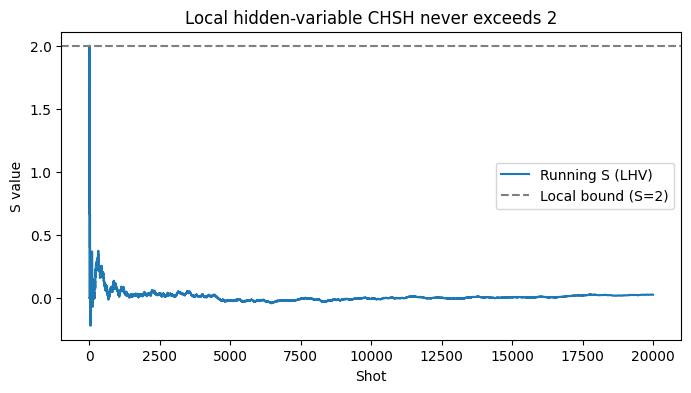

In [1]:
import numpy as np
import matplotlib.pyplot as plt

labels = ('a', 'a_prime', 'b', 'b_prime')
pairs = (
    ('a', 'b'),
    ('a', 'b_prime'),
    ('a_prime', 'b'),
    ('a_prime', 'b_prime'),
)

def local_hidden_variable_stream(shots=20000, schedule='cycle', seed=42):
    rng = np.random.default_rng(seed)
    corr_sums = {pair: 0.0 for pair in pairs}
    corr_counts = {pair: 0 for pair in pairs}
    running_s = []
    shot_axis = []
    for idx in range(1, shots + 1):
        hidden = {label: rng.choice((-1, 1)) for label in labels}
        if schedule == 'random':
            pair = pairs[int(rng.integers(len(pairs)))]
        else:
            pair = pairs[(idx - 1) % len(pairs)]
        product = hidden[pair[0]] * hidden[pair[1]]
        corr_sums[pair] += product
        corr_counts[pair] += 1
        if all(corr_counts[p] > 0 for p in pairs):
            e_vals = [corr_sums[p] / corr_counts[p] for p in pairs]
            running_s.append(e_vals[0] + e_vals[1] + e_vals[2] - e_vals[3])
            shot_axis.append(idx)
    return shot_axis, running_s

shots = 20000
shot_axis, running_s = local_hidden_variable_stream(shots=shots, schedule='cycle', seed=99)

plt.figure(figsize=(8, 4))
plt.plot(shot_axis, running_s, label='Running S (LHV)')
plt.axhline(2.0, color='tab:gray', linestyle='--', label='Local bound (S=2)')
plt.xlabel('Shot')
plt.ylabel('S value')
plt.title('Local hidden-variable CHSH never exceeds 2')
plt.legend()
plt.show()

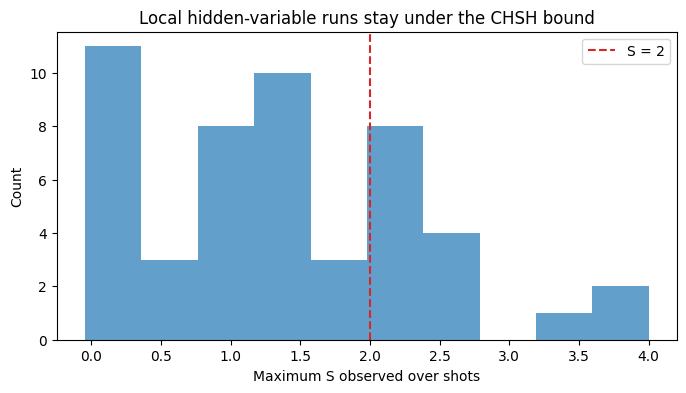

In [2]:
# Repeat the LHV sampler a few times to show the distribution stays below 2.
replications = 50
shots = 5000
seeds = range(replications)
max_values = []
for seed in seeds:
    _, s_series = local_hidden_variable_stream(shots=shots, schedule='random', seed=seed)
    if s_series:
        max_values.append(max(s_series))

plt.figure(figsize=(8, 4))
plt.hist(max_values, bins=10, color='tab:blue', alpha=0.7)
plt.axvline(2.0, color='tab:red', linestyle='--', label='S = 2')
plt.xlabel('Maximum S observed over shots')
plt.ylabel('Count')
plt.title('Local hidden-variable runs stay under the CHSH bound')
plt.legend()
plt.show()

## Explore variations

Change the schedule, increase the number of shots, or bias the hidden assignments to
see how the classical ceiling persists.